In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
from os.path import isfile, join
from PIL import Image
import os.path, sys
import glob


## 1. specify folder

In [2]:
path = "/Users/rubyjiang/Desktop/Keyhole-image-segmentation/application/model_output_masks/ML/ML_train_masks"
imgList=sorted(glob.glob(path+ '/*.tif'))
print(len(imgList))

944


## 2. specifiy features

In [3]:
def extractFeatures(img):
    
    num_white_pixel = np.sum(img == 1) 
    num_white_pixel_row = np.sum(img == 1, 1) 
    # get the index of non zero rows
    nonzero_index = [i for i, e in enumerate(num_white_pixel_row) if e != 0]
    depth = len(nonzero_index)
    # avg width
    avg_width = 0
    if depth != 0:
        avg_width = np.sum(num_white_pixel_row) / depth
    width_top, width_quarter, width_half, width_3quarter = 0, 0, 0, 0
    # width
    if depth == 1:
        width_top = num_white_pixel_row[nonzero_index[0]] 
    if depth == 2:
        width_top = num_white_pixel_row[nonzero_index[0]] 
        width_quarter = num_white_pixel_row[nonzero_index[1]]
    if depth == 3:
        width_top = num_white_pixel_row[nonzero_index[0]] 
        width_quarter = num_white_pixel_row[nonzero_index[1]]
        width_half = num_white_pixel_row[nonzero_index[2]]
    if depth == 4:
        width_top = num_white_pixel_row[nonzero_index[0]] 
        width_quarter = num_white_pixel_row[nonzero_index[1]]
        width_half = num_white_pixel_row[nonzero_index[2]]
        width_3quarter = num_white_pixel_row[nonzero_index[3]]
    if depth >= 5:
        # index
        top_index = nonzero_index[0]
        quarter_index = top_index + round(len(nonzero_index) * 0.25)
        half_index = top_index + len(nonzero_index)//2 
        threequarter_index = top_index + round(len(nonzero_index) * 0.75)
        #
        width_top = num_white_pixel_row[top_index]
        width_quarter = num_white_pixel_row[quarter_index]
        width_half = num_white_pixel_row[half_index]
        width_3quarter = num_white_pixel_row[threequarter_index]
    # widest width
    wwidth = 0
    if depth !=0:
        min_col = len(img)
        max_col = 0
        for row in range(len(img)):
            for col in range(len(img[0])):
                if img[row][col] != 0 :
                    min_col = min(min_col, col)
                    max_col = max(max_col, col)
        wwidth = max(wwidth, max_col - min_col)   
    # perimeter
    perimeter = 0
    contours,hierarchy = cv.findContours(img, 1, 2)
    if contours:
        cnt = contours[0]
        perimeter = cv.arcLength(cnt,True)
    # front wall angle 
    tan_theta = None
    if depth >= 5:
        up_index =  nonzero_index[round(len(nonzero_index)/10)]
        down_index =  nonzero_index[round(len(nonzero_index)*9/10)]
        right_index = np.nonzero(img[up_index])[-1][-1]
        left_index = np.nonzero(img[down_index])[-1][-1]
        if abs(right_index-left_index) == 0:
            tan_theta = 180 # just to make sure theta is 90
        else:
            tan_theta = abs(up_index-down_index)/abs(right_index-left_index)

        
    return [depth,
            width_top,
            width_quarter,
            width_half,
            width_3quarter,
            avg_width,
            wwidth,
            num_white_pixel,
            perimeter,
            tan_theta,
           ]

In [4]:
data= {
    'img_name':[],
    'depth':[],
    'width_top' :[],
    'width_quarter':[],
    'width_half':[],
    'width_3quarter':[],
    'avg_width':[],
    'widest_width':[],
    'num_white_pixel':[],
    'perimeter':[],
    'tan_theta': []
          }
df = pd.DataFrame(data)
print(len(df))

0


In [5]:
for i in range(len(imgList)):
    frame = imgList[i]
    name = frame.split('/')[-1]
    print(name)
    # img
    img = cv.imread(frame, cv.IMREAD_UNCHANGED).astype(np.uint8)
    #cv.imshow('Original Image', img)
    # rotate colockwise 7 degree
    height, width = img.shape[:2]
    # Define rotation matrix using cv2.getRotationMatrix2D
    rotation_matrix = cv.getRotationMatrix2D((width/2, height/2), -7, 1)
    # Apply rotation using cv2.warpAffine
    img = cv.warpAffine(img, rotation_matrix, (width, height))
    # Flip image horizontally using cv2.flip
    img = cv.flip(img, 1)
    
    # contour
    contours,hierarchy = cv.findContours(img, 1, 2)
    areas = [cv.contourArea(contour) for contour in contours]
    if len(areas) != 0:
        keyhole_index = np.argmax(areas)
#         if i != 836-1: # special for frame 836 in train_masks
#             keyhole_index = np.argmax(areas)
#         else:
#             keyhole_index = np.argmin(areas)
        pores_index = [i for i in range(len(areas)) if i != keyhole_index]
        img = cv.fillPoly(img,pts= [contours[i] for i in pores_index],color = 0)
    feature_list = extractFeatures(img)
    #print(feature_list)
    df.loc[i] = [name] + feature_list

frame_0001.tif
frame_0002.tif
frame_0003.tif
frame_0004.tif
frame_0005.tif
frame_0006.tif
frame_0007.tif
frame_0008.tif
frame_0009.tif
frame_0010.tif
frame_0011.tif
frame_0012.tif
frame_0013.tif
frame_0014.tif
frame_0015.tif
frame_0016.tif
frame_0017.tif
frame_0018.tif
frame_0019.tif
frame_0020.tif
frame_0021.tif
frame_0022.tif
frame_0023.tif
frame_0024.tif
frame_0025.tif
frame_0026.tif
frame_0027.tif
frame_0028.tif
frame_0029.tif
frame_0030.tif
frame_0031.tif
frame_0032.tif
frame_0033.tif
frame_0034.tif
frame_0035.tif
frame_0036.tif
frame_0037.tif
frame_0038.tif
frame_0039.tif
frame_0040.tif
frame_0041.tif
frame_0042.tif
frame_0043.tif
frame_0044.tif
frame_0045.tif
frame_0046.tif
frame_0047.tif
frame_0048.tif
frame_0049.tif
frame_0050.tif
frame_0051.tif
frame_0052.tif
frame_0053.tif
frame_0054.tif
frame_0055.tif
frame_0056.tif
frame_0057.tif
frame_0058.tif
frame_0059.tif
frame_0060.tif
frame_0061.tif
frame_0062.tif
frame_0063.tif
frame_0064.tif
frame_0065.tif
frame_0066.tif
frame_0067

frame_0596.tif
frame_0597.tif
frame_0598.tif
frame_0599.tif
frame_0600.tif
frame_0601.tif
frame_0602.tif
frame_0603.tif
frame_0604.tif
frame_0605.tif
frame_0606.tif
frame_0607.tif
frame_0608.tif
frame_0609.tif
frame_0610.tif
frame_0611.tif
frame_0612.tif
frame_0613.tif
frame_0614.tif
frame_0615.tif
frame_0616.tif
frame_0617.tif
frame_0618.tif
frame_0619.tif
frame_0620.tif
frame_0621.tif
frame_0622.tif
frame_0623.tif
frame_0624.tif
frame_0625.tif
frame_0626.tif
frame_0627.tif
frame_0628.tif
frame_0629.tif
frame_0630.tif
frame_0631.tif
frame_0632.tif
frame_0633.tif
frame_0634.tif
frame_0635.tif
frame_0636.tif
frame_0637.tif
frame_0638.tif
frame_0639.tif
frame_0640.tif
frame_0641.tif
frame_0642.tif
frame_0643.tif
frame_0644.tif
frame_0645.tif
frame_0646.tif
frame_0647.tif
frame_0648.tif
frame_0649.tif
frame_0650.tif
frame_0651.tif
frame_0652.tif
frame_0653.tif
frame_0654.tif
frame_0655.tif
frame_0656.tif
frame_0657.tif
frame_0658.tif
frame_0659.tif
frame_0660.tif
frame_0661.tif
frame_0662

In [6]:
len(df)

944

In [23]:
df[]

,img_name,depth,width_top,width_quarter,width_half,width_3quarter,avg_width,widest_width,num_white_pixel,perimeter,tan_theta
0,frame_0001.tif,0,0,0,0,0,0.0,0,0,0.000000,NaN
1,frame_0002.tif,0,0,0,0,0,0.0,0,0,0.000000,NaN
2,frame_0003.tif,0,0,0,0,0,0.0,0,0,0.000000,NaN
3,frame_0004.tif,0,0,0,0,0,0.0,0,0,0.000000,NaN
4,frame_0005.tif,0,0,0,0,0,0.0,0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
939,frame_0940.tif,2,6,3,0,0,4.5,5,9,10.828427,None
940,frame_0941.tif,2,6,3,0,0,4.5,5,9,10.828427,None
941,frame_0942.tif,2,6,3,0,0,4.5,5,9,10.828427,None
942,frame_0943.tif,2,5,3,0,0,4.0,4,8,9.414214,None


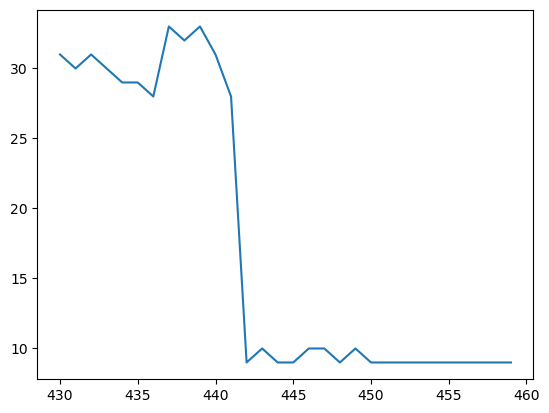

In [19]:
plt.plot(df['depth'][430:460])

In [ ]:
df.describe()

In [24]:
save_path = '/Users/rubyjiang/Desktop/'
df.to_csv(save_path + 'ML_train_features.csv', index = False, header=True) #,float_format='%.8f')